
# <font color=red>**TED Talks**</font>

[Kaggle Competition](https://www.kaggle.com/rounakbanik/ted-talks)

[GitHub - Carlos Scovino](https://github.com/cscovino/TED-Talks-Analysis)


###  <font color=blue> **Archivo**:</font>  ted_main.csv


| Columna | Tipo | Descripcion | Tratamiento |
| :--- | :--- | :--- | :--- |
|  <font color=blue>**comments**</font> | Numeric | The number of first level comments made on the talk | Estandarizar |
|  <font color=blue>**description**</font> | Text | A blurb of what the talk is about | ¿? |
|  <font color=blue>**duration**</font> | Numeric | The duration of the talk in seconds | Estandarizar |
|  <font color=blue>**event**</font> | Text | The TED/TEDx event where the talk took place | ¿drop? |
|  <font color=blue>**film_date**</font> | Timestamp | The Unix timestamp of the filming | Se convierte a datetime. |
|  <font color=blue>**languages**</font> | Numeric | The number of languages in which the talk is available | Estandarizar |
|  <font color=blue>**main_speaker**</font> | Text | The first named speaker of the talk | ¿? |
|  <font color=blue>**name**</font> | Text | The official name of the TED Talk. Includes the title and the speaker. | |
|  <font color=blue>**num_speaker**</font> | Numeric | The number of speakers in the talk | Estandarizar |
|  <font color=blue>**published_date**</font> | Timestamp | The Unix timestamp for the publication of the talk on TED.com | Se convierte a datetime. |
|  <font color=blue>**ratings**</font> | Text | A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.) | Se generó 14 columnas dummy |
|  <font color=blue>**related_talks**</font> | Text | A list of dictionaries of recommended talks to watch next | |
|  <font color=blue>**speaker_occupation**</font> | Text | The occupation of the main speaker | |
|  <font color=blue>**tags**</font> | Text | The themes associated with the talk | Se generó columnas dummy por las 50 más usadas |
|  <font color=blue>**title**</font> | Text | The title of the talk | |
|  <font color=blue>**url**</font> | Text | The URL of the talk | |
|  <font color=blue>**views**</font> | Numeric | The number of views on the talk | |

###  <font color=blue> **Archivo**:</font>  transcripts.csv

| Columna | Tipo | Descripcion |
| :--- | :--- | :--- |
| <font color=blue>**transcript**</font> | Text | The official English transcript of the talk. |
| <font color=blue>**url**</font> | Text | The URL of the talk |

<div class="alert alert-block alert-info">

# Imports

</div>

In [2]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime, date
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

<div class="alert alert-block alert-info">

# Dataframes

</div>

In [3]:
df_main = pd.read_csv('./dataset/ted_main.csv',sep=",",quotechar='"')
df_transcript = pd.read_csv('./dataset/transcripts.csv',sep=",",quotechar='"')

<div class="alert alert-block alert-info">

### Data: Main

</div>

In [4]:
df_main.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [5]:
df_main.count()[0]

2550

In [6]:
df_main.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [7]:
df_main.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [8]:
df_main.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


<div class="alert alert-block alert-success">

## Fechas: _film\_date, published\_date_

1.  **film_date:** The Unix timestamp of the filming.
2.  **published_date:** The Unix timestamp for the publication of the talk on TED.com

 > **Tratamiento:** 
 > * Se extrae mes en columna y se debe transformar a dummies
 > * Variable por día de la semana

</div>

In [9]:
fun_ux2dttm = lambda x: datetime.fromtimestamp(int(x))
fun_ux2dt = lambda x: date.fromtimestamp(int(x))

df_main['film_date'] = df_main['film_date'].apply(fun_ux2dttm)
df_main['published_date'] = df_main['published_date'].apply(fun_ux2dttm)

df_main['film_date'] =  pd.to_datetime(df_main['film_date'])
df_main['published_date'] =  pd.to_datetime(df_main['published_date'])

In [10]:
df_main.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date             datetime64[ns]
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date        datetime64[ns]
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
dtype: object

In [11]:
df_main['film_month_name'] = pd.DatetimeIndex(df_main['film_date']).month_name()
df_main['film_day_name'] = pd.DatetimeIndex(df_main['film_date']).day_name()

df_main['published_month_name'] = pd.DatetimeIndex(df_main['published_date']).month_name()
df_main['published_day_name'] = pd.DatetimeIndex(df_main['published_date']).day_name()

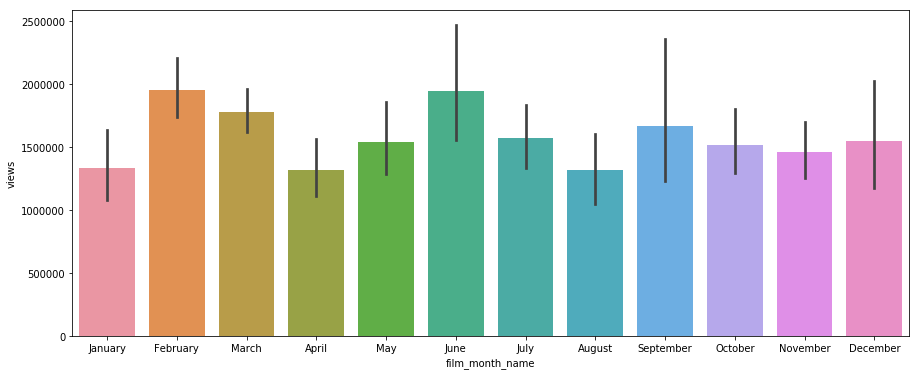

In [12]:
plt.figure(figsize=(15,6))
sns.barplot(x='film_month_name', y='views', data=df_main, 
            order=['January','February','March','April','May','June',
                   'July','August','September','October','November','December'])

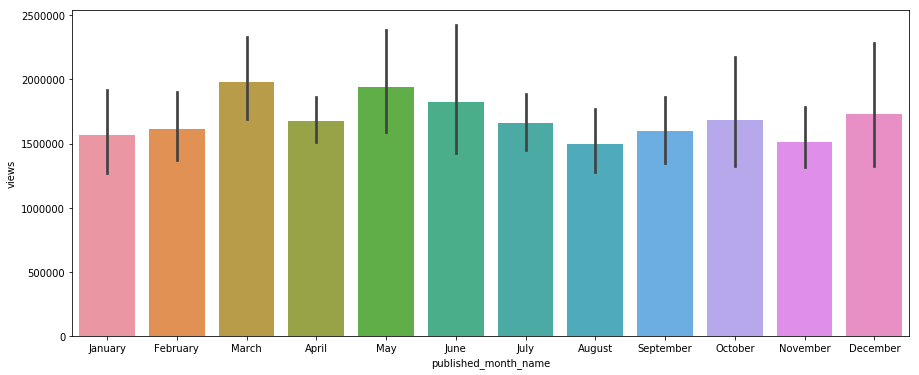

In [13]:
plt.figure(figsize=(15,6))
sns.barplot(x='published_month_name', y='views', data=df_main, 
            order=['January','February','March','April','May','June',
                   'July','August','September','October','November','December'])

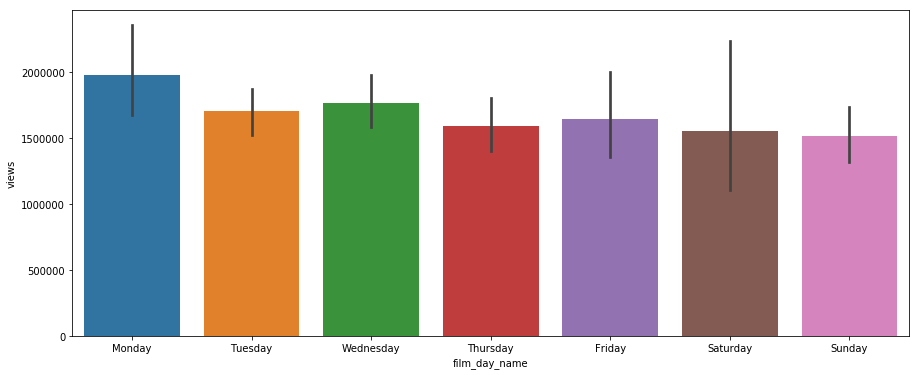

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(x='film_day_name', y='views', data=df_main, 
            order=['Monday','Tuesday','Wednesday','Thursday',
                   'Friday','Saturday','Sunday'])

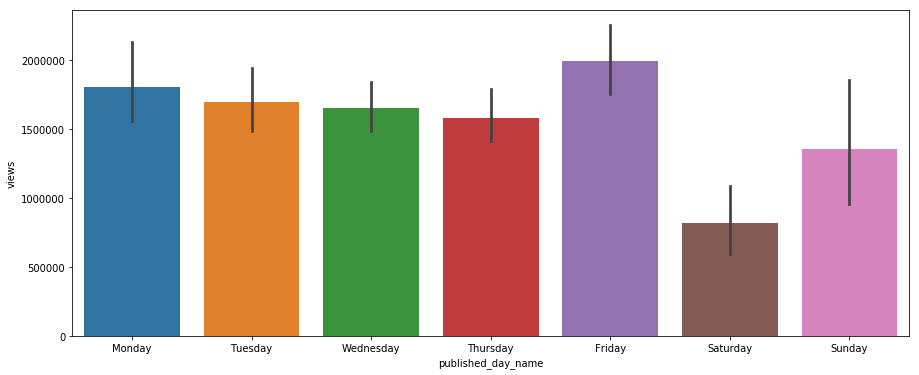

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(x='published_day_name', y='views', data=df_main, 
            order=['Monday','Tuesday','Wednesday','Thursday',
                   'Friday','Saturday','Sunday'])

In [16]:
df_main['film_year'] = pd.DatetimeIndex(df_main['film_date']).year
df_main['film_month'] = pd.DatetimeIndex(df_main['film_date']).month
df_main['film_dayofweek'] = pd.DatetimeIndex(df_main['film_date']).weekday

df_main['published_year'] = pd.DatetimeIndex(df_main['published_date']).year
df_main['published_month'] = pd.DatetimeIndex(df_main['published_date']).month
df_main['published_dayofweek'] = pd.DatetimeIndex(df_main['published_date']).weekday

In [17]:
df_main[['published_date','published_year','published_month','published_dayofweek']].head()

,published_date,published_year,published_month,published_dayofweek
0,2006-06-26 21:11:00,2006,6,0
1,2006-06-26 21:11:00,2006,6,0
2,2006-06-26 21:11:00,2006,6,0
3,2006-06-26 21:11:00,2006,6,0
4,2006-06-27 17:38:00,2006,6,1


<div class="alert alert-block alert-success">

## Campo: _comments_
The number of first level comments made on the talk.

 > **Tratamiento:** Se debe estandarizar el campo. Primero se debe realizar el 'train_test_split' y unicamente standarizar con los datos de train.

</div>

In [18]:
df_main['comments'].head()

0    4553
1     265
2     124
3     200
4     593
Name: comments, dtype: int64

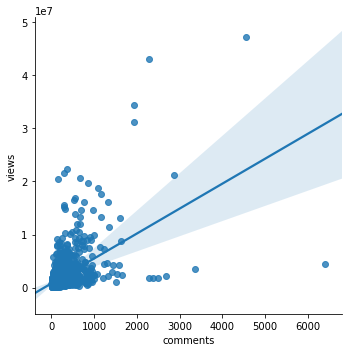

In [19]:
df_comments = df_main.sort_values('views', ascending=False)
df_comments = df_comments.sort_values('comments')
sns.lmplot(x="comments", y="views", data=df_comments)

<div class="alert alert-block alert-success">

## Campo: _description_
A blurb of what the talk is about.

## Campo: _title_
The title of the talk


 > **Tratamiento:**
 >  * Se unen los campo 'description' y 'title'
 >  * Se reemplazan (\_)(—)(-)(/) por spacios
 >  * Se reemplaza (’) por (')
 >  * Se eliminan (")
 >  * Se expanden las 'contractions' (ej.: don't --> do not)
 >  * Se descartan caracteres de puntuación
 >  * Se reemplazan los terminos plurales por su singular (pip install inflection)
 >  * Se reemplaza el termino por su 'lemma' (pip install nltk)
 >  * Se vectoriza (CountVectorizer, stop_words + min_df=0.01)
 
 Contractions:
  * https://pypi.org/project/pycontractions/
  * https://code.google.com/archive/p/word2vec/
 

</div>

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
from inflection import singularize

vec = CountVectorizer(stop_words='english', min_df=0.01)

In [21]:
from pycontractions import Contractions

cont = Contractions('GoogleNews-vectors-negative300.bin')
cont.load_models()

ImportError: No module named 'pycontractions'

### _Elimino Contractions_

In [0]:
def replace_chars(s):
    
    my_s = s.str.replace("’","'")
    my_s = my_s.str.replace('"','')
    my_s = my_s.str.replace("_"," ")
    my_s = my_s.str.replace("-"," ")
    my_s = my_s.str.replace("—"," ")
    my_s = my_s.str.replace("/"," ")
    
    return my_s

In [0]:
# Junto Título y Descripción
df_words2vec = pd.DataFrame(replace_chars(df_main['description']) + ' ' + replace_chars(df_main['title']),
                            columns=['texto'])

# Elimino las "contractions"
lst_expand = list(cont.expand_texts(list(df_words2vec['texto']), precise=True))

# Reemplazo la columna
df_words2vec['texto'] = pd.Series(lst_expand)

In [0]:
i=2
print(df_main['description'][i])
print(lst_expand[i])

New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products that get it right. To funny things up, he bursts into song.
New York Times columnist David Pogue takes aim at technology's worst interface design offenders, and provides encouraging examples of products that get it right. To funny things up, he bursts into song. Simplicity sells


In [0]:
df_words2vec['texto'][2]

"New York Times columnist David Pogue takes aim at technology's worst interface design offenders, and provides encouraging examples of products that get it right. To funny things up, he bursts into song. Simplicity sells"

In [0]:
lst = list(cont.expand_texts(["challenges the idea that we'll be miserable don't"], precise=True))
print(lst)

['challenges the idea that we will be miserable do not']


In [0]:
import nltk

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [0]:
nltk.word_tokenize("year years")

['year', 'years']

In [0]:
for word in ['year','years']:
    print(wordnet_lemmatizer.lemmatize(word, pos="v"))

year
years


In [0]:
for word in ['year','years','dogs','wolves','children','aunts','animals','decisions']:
    print(singularize(word))

year
year
dog
wolf
child
aunt
animal
decision


In [0]:
"000".isdigit()

True

In [0]:
punctuations=r"?!:;.,+-\'()[]{}^/\\"

lst_textos = []

for ix, row in df_words2vec.iterrows():

    #if ix!=60: continue
    
    print("OLD[{}]:{}".format(ix,row['texto']))
    myrow = row['texto']
    
    new_sentence = []
    sentence_words = nltk.word_tokenize(myrow)
    #print("Tokenize:{}".format(sentence_words))

    for word in sentence_words:
        word = word.strip()
        if word not in punctuations and not word.isdigit() and word not in ["'s","--"]:
            #print("Word:{}".format(word))
            word_singular = singularize(word)
            word_lemma = wordnet_lemmatizer.lemmatize(word_singular, pos="v")
            new_sentence.append(word_lemma)
            
    #if "ideas" in new_sentence:
    #    print(ix)
    
    print("NEW[{}]:{}".format(ix," ".join(new_sentence)))
    print("-------------------")
    
    lst_textos.append(" ".join(new_sentence))



OLD[0]:Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity. Do schools kill creativity?
NEW[0]:Sir Ken Robinson make an entertain and profoundly move case for create an education system that nurture rather than undermine creativity Do school kill creativity
-------------------
OLD[1]:With the same humor and humanity he exuded in An Inconvenient Truth, Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming. Averting the climate crisis
NEW[1]:With the same humor and humanity he exude in An Inconvenient Truth Al Gore spell out way that individual can address climate change immediately from buy a hybrid to invent a new hotter brand name for global warm Averting the climate crisis
-------------------
OLD[2]:New York Times columnist David Pogue takes aim at technology's worst interface desig

NEW[67]:In a world of too many option and too little time our obviou choice i to just ignore the ordinary stuff Marketing guru Seth Godin spell out why when it come to get our attention bad or bizarre idea be more successful than bore one How to get your idea to spread
-------------------
OLD[68]:Nobel laureate James Watson opens TED2005 with the frank and funny story of how he and his research partner, Francis Crick, discovered the structure of DNA. How we discovered DNA
NEW[68]:Nobel laureate Jame Watson open TED2005 with the frank and funny story of how he and hi research partner Franci Crick discover the structure of DNA How we discover DNA
-------------------
OLD[69]:Al Seckel, a cognitive neuroscientist, explores the perceptual illusions that fool our brains. Loads of eye tricks help him prove that not only are we easily fooled, we kind of like it. Visual illusions that show how we (mis)think
NEW[69]:Al Seckel a cognitive neuroscientist explore the perceptual illusion that fool o

NEW[201]:Jill Bolte Taylor get a research opportunity few brain scientist would wish for She have a massive stroke and watch a her brain function motion speech self awareness shut down one by one An astonish story My stroke of insight
-------------------
OLD[202]:Before he was a legend, architect Frank Gehry takes a whistlestop tour of his early work, from his house in Venice Beach to the American Center in Paris, which was under construction (and much on his mind) when he gave this talk. My days as a young rebel
NEW[202]:Before he wa a legend architect Frank Gehry take a whistlestop tour of hi early work from hi house in Venice Beach to the American Center in Pari which wa under construction and much on hi mind when he give thi talk My day a a young rebel
-------------------
OLD[203]:Accepting his 2008 TED Prize, author Dave Eggers asks  the TED community to personally, creatively engage with local public schools. With spellbinding eagerness, he talks about how his 826 Valencia tutori

NEW[279]:Imagine hear great depart pianist play again today just a they would in person John Q. Walker demonstrate how record can be analyze for precise keystroke and pedal motion then play back on computer control grand piano Great piano performance recreate
-------------------
OLD[280]:Speaking at LIFT 2007, Sugata Mitra talks about his Hole in the Wall project. Young kids in this project figured out how to use a PC on their own    and then taught other kids. He asks, what else can children teach themselves? Kids can teach themselves
NEW[280]:Speaking at LIFT Sugatum Mitra talk about hi Hole in the Wall project Young kid in thi project figure out how to use a PC on their own and then teach other kid He ask what else can child teach themself Kid can teach themself
-------------------
OLD[281]:Ory Okolloh tells the story of her life and her family    and how she came to do her heroic work reporting on the doings of Kenya's parliament. How I became an activist
NEW[281]:Ory Okolloh tell 

NEW[368]:Customer want to feel what they buy i authentic but Mass Customization author Joseph Pine say sell authenticity i tough because well there i no such thing He talk about a few experience that may be artificial but make million anyway What consumer want
-------------------
OLD[369]:Paula Scher looks back at a life in design (she is done album covers, books, the Citibank logo ...) and pinpoints the moment when she started really having fun. Look for gorgeous designs and images from her legendary career. Great design is serious, not solemn
NEW[369]:Paula Scher look back at a life in design she i do album cover book the Citibank logo ... and pinpoint the moment when she start really have fun Look for gorgeou design and image from her legendary career Great design i seriou not solemn
-------------------
OLD[370]:Great design is a never ending journey of discovery    for which it helps to pack a healthy sense of humor. Sociologist and surfer turned designer David Carson walks through

NEW[444]:Louise Fresco show u why we should celebrate mass produce supermarket style white bread She say environmentally sound mass production will fee the world yet leave a role for small bakery and traditional method We need to fee the whole world
-------------------
OLD[445]:Seth Godin argues the Internet has ended mass marketing and revived a human social unit from the distant past: tribes. Founded on shared ideas and values, tribes give ordinary people the power to lead and make big change. He urges us to do so. The tribes we lead
NEW[445]:Seth Godin argue the Internet ha end mass market and revive a human social unit from the distant past tribe Founded on share idea and value tribe give ordinary person the power to lead and make big change He urge u to do so The tribe we lead
-------------------
OLD[446]:Eric Lewis explores the piano's expressive power as he pounds and caresses the keys (and the strings) in a performance during the 2009 TED Prize session. He plays an original son

NEW[506]:A we reboot the world economy Geoff Mulgan pose a question Instead of send bailout money to doom old industry why not use stimulu fund to bootstrap some new socially responsible company and make the world a little bite better Post crash invest in a better world
-------------------
OLD[507]:Evan Grant demonstrates the science and art of cymatics, a process for making soundwaves visible. Useful for analyzing complex sounds (like dolphin calls), it also makes complex and beautiful designs. Making sound visible through cymatics
NEW[507]:Evan Grant demonstrate the science and art of cymatic a process for make soundwafe visible Useful for analyze complex sound like dolphin call it also make complex and beautiful design Making sound visible through cymatic
-------------------
OLD[508]:At his day job, Steve Truglia flips cars, walks through fire and falls out of buildings    pushing technology to make stunts bigger, safer, more awesome. He talks us through his next stunt: the highest 

NEW[596]:In thi highly personal talk from TEDMED magician and stuntman David Blaine describe what it take to hold hi breath underwater for minute a world record only two minute shorter than thi entire talk and what hi often death defy work mean to him Warning do NOT try thi at home How I hold my breath for minute
-------------------
OLD[597]:Collector Ravin Agrawal delivers a glowing introduction to 10 of India's most exciting young contemporary artists. Working in a variety of media, each draws on their local culture for inspiration. 10 young Indian artists to watch
NEW[597]:Collector Ravin Agrawal deliver a glow introduction to of Indium most excite young contemporary artist Working in a variety of medium each draw on their local culture for inspiration young Indian artist to watch
-------------------
OLD[598]:Anthony Atala's state of the art lab grows human organs    from muscles to blood vessels to bladders, and more. At TEDMED, he shows footage of his bio engineers working with so

NEW[674]:Simplicity We know it when we see it but what i it exactly In thi funny philosophical talk George Whiteside chisel out an answer Toward a science of simplicity
-------------------
OLD[675]:In a brilliantly tongue in cheek analysis, Sebastian Wernicke turns the tools of statistical analysis on TEDTalks, to come up with a metric for creating the optimum TEDTalk based on user ratings. How do you rate it? Jaw dropping? Unconvincing? Or just plain Funny? Lies, damned lies and statistics (about TEDTalks)
NEW[675]:In a brilliantly tongue in cheek analysis Sebastian Wernicke turn the tool of statistical analysis on TEDTalk to come up with a metric for create the optimum TEDTalk base on user rat How do you rate it Jaw drop Unconvincing Or just plain Funny Ly damn ly and statistic about TEDTalk
-------------------
OLD[676]:Alleviating poverty is more guesswork than science, and lack of data on aid's impact raises questions about how to provide it. But Clark Medal winner Esther Duflo say

NEW[754]:Physic and market do not seem to have much in common but Dan Cobley i passionate about both He bring these unlikely bedfellow together use Newton second law Heisenberg uncertainty principle the scientific method and the second law of thermodynamic to explain the fundamental theory of brand What physic teach me about market
-------------------
OLD[755]:Statistician Nic Marks asks why we measure a nation's success by its productivity    instead of by the happiness and well being of its people. He introduces the Happy Planet Index, which tracks national well being against resource use (because a happy life does not have to cost the earth). Which countries rank highest in the HPI? You might be surprised. The Happy Planet Index
NEW[755]:Statistician Nic Mark ask why we measure a nation success by it productivity instead of by the happiness and well be of it person He introduce the Happy Planet Index which track national well be against resource use because a happy life do not have 

NEW[818]:In war we often see only the frontline story of soldier and combat AT TEDGlobal Zainab Salbi tell powerful backline story of woman who keep everyday life go during conflict and call for woman to have a place at the negotiate table once fight i over Woman wartime and the dream of peace
-------------------
OLD[819]:Jason Fried has a radical theory of working: that the office is not a good place to do it. He calls out the two main offenders (call them the M&Ms) and offers three suggestions to make the workplace actually work. Why work does not happen at work
NEW[819]:Jason Fried ha a radical theory of work that the office i not a good place to do it He call out the two main offender call them the M & M and offer three suggestion to make the workplace actually work Why work do not happen at work
-------------------
OLD[820]:In this funny and inspiring talk, Dan Phillips tours us through a dozen homes he is built in Texas using recycled and reclaimed materials in wildly creative wa

NEW[880]:French street artist JR use hi camera to show the world it true face by paste photo of the human face across massive canvase At TED2011 he make hi audaciou TED Prize wish to use art to turn the world inside out My wish Use art to turn the world inside out
-------------------
OLD[881]:Wael Ghonim is the Google executive who helped jumpstart Egypt's democratic revolution ... with a Facebook page memorializing a victim of the regime's violence. Speaking at TEDxCairo, he tells the inside story of the past two months, when everyday Egyptians showed that the power of the people is stronger than the people in power. Inside the Egyptian revolution
NEW[881]:Wael Ghonim i the Google executive who help jumpstart Egypt democratic revolution ... with a Facebook page memorialize a victim of the regime violence Speaking at TEDxCairo he tell the inside story of the past two month when everyday Egyptian show that the power of the person i stronger than the person in power Inside the Egyptian r

NEW[962]:Musician and inventor Onyx Ashanti demonstrate beatjazz hi music create with two handheld controller an iPhone and a mouthpiece and play with the entire body At TED Full Spectrum Audition after lock in hi beat and loop he play a minute song that share hi vision for the future of music Thi i beatjazz
-------------------
OLD[963]:Cellist Maya Beiser plays a gorgeous eight part modern etude with seven copies of herself, and segues into a meditative music video hybrid    using tech to create endless possibilities for transformative sound. Music is Steve Reich's Cello Counterpoint, with video from Bill Morrison, then David Lang's World to Come, with video by Irit Batsry. A cello with many voices
NEW[963]:Cellist Maya Beiser play a gorgeou eight part modern etude with seven copy of herself and segue into a meditative music video hybrid use tech to create endless possibility for transformative sound Music i Steve Reich Cello Counterpoint with video from Bill Morrison then David Lang 

NEW[1037]:Here a powerful provocation from artist Jae Rhim Lee Can we commit our body to a cleaner greener Earth even after death Naturally use a special burial suit seed with pollution gobble mushroom Ye thi just might be the strangest TEDTalk you will ever see ... My mushroom burial suit
-------------------
OLD[1038]:In Rajasthan, India, an extraordinary school teaches rural women and men    many of them illiterate    to become solar engineers, artisans, dentists and doctors in their own villages. it is called the Barefoot College, and its founder, Bunker Roy, explains how it works. Learning from a barefoot movement
NEW[1038]:In Rajasthan Indium an extraordinary school teach rural woman and man many of them illiterate to become solar engineer artisan dentist and doctor in their own village it i call the Barefoot College and it founder Bunker Roy explain how it work Learning from a barefoot movement
-------------------
OLD[1039]:What would happen if we could generate power from our wi

NEW[1096]:At TEDMED Sheila Nirenberg show a bold way to create sight in person with certain kind of blindness by hook into the optic nerve and send signal from a camera direct to the brain A prosthetic eye to treat blindness
-------------------
OLD[1097]:Every day, we make decisions that have good or bad consequences for our future selves. (Can I skip flossing just this one time?) Daniel Goldstein makes tools that help us imagine ourselves over time, so that we make smart choices for Future Us. The battle between your present and future self
NEW[1097]:Every day we make decision that have good or bad consequence for our future self Can I skip floss just thi one time Daniel Goldstein make tool that help u imagine ourself over time so that we make smart choice for Future U The battle between your present and future self
-------------------
OLD[1098]:Political prisoners are not the only ones being tortured    the vast majority of judicial torture happens in ordinary cases, even in 'functio

NEW[1182]:Taylor Wilson beliefe nuclear fusion i a solution to our future energy need and that kid can change the world And he know something about both of those When he wa he build a work fusion reactor in hi parent garage Now he take the TED stage at short notice to tell the short version of hi story Yup I build a nuclear fusion reactor
-------------------
OLD[1183]:Combining dry wit with artistic depth, Billy Collins shares a project in which several of his poems we are turned into delightful animated films in a collaboration with Sundance Channel. Five of them are included in this wonderfully entertaining and moving talk    and do not miss the hilarious final poem! Everyday moments, caught in time
NEW[1183]:Combining dry wit with artistic depth Billy Collin share a project in which several of hi poem we be turn into delightful animate film in a collaboration with Sundance Channel Five of them be include in thi wonderfully entertain and move talk and do not miss the hilariou final p

NEW[1243]:How much land mass would renewable need to power a nation like the UK An entire country worth In thi pragmatic talk David MacKay tour the basic mathematic that show worry limitation on our sustainable energy option ... and explain why we should pursue them anyway A reality check on renewable
-------------------
OLD[1244]:The more that robots ingrain themselves into our everyday lives, the more we are forced to examine ourselves as people. At TEDxBerkeley, Ken Goldberg shares four very human lessons that he is learned from working with robots. 4 lessons from robots about being human
NEW[1244]:The more that robot ingrain themself into our everyday life the more we be force to examine ourself a person At TEDxBerkeley Ken Goldberg share four very human lesson that he i learn from work with robot lesson from robot about be human
-------------------
OLD[1245]:How do you read a two thousand year old manuscript that has been erased, cut up, written on and painted over? With a powerfu

NEW[1315]:It seem the more we know about how democracy work through government transparency better medium coverage even new insight about our brain the less we trust democracy itself Yet it i still arguably the best system of government available A Ivan Krastev say What go right i also what go wrong Can democracy survive Can democracy exist without trust
-------------------
OLD[1316]:When a freak tornado hit their hometown, sisters Caitria and Morgan O'Neill    just 20 and 24 at the time    realized they had to jump in and help. What they learned is: After a natural disaster, there is only a tiny window before the world turns its sympathy (and its donations) elsewhere    so it is important to be prepared for every aspect of recovery. Watch this talk to learn how to step up in a timely fashion for your own community. How to step up in the face of disaster
NEW[1316]:When a freak tornado hit their hometown sister Caitrium and Morgan O'Neill just and at the time realize they have to jump i

NEW[1371]:When be human most happy To gather datum on thi question Matt Killingsworth build an app Track Your Happiness that let person report their feel in real time Among the surprise result we be often happiest when we be lose in the moment And the flip side The more our mind wander the less happy we can be Want to be happier Stay in the moment
-------------------
OLD[1372]:After fighting overseas, 92 percent of American veterans say they want to continue their service. Meanwhile, one after another, natural disasters continue to wreak havoc worldwide. What do these two challenges have in common? In telling the story of his friend Clay Hunt, Jake Wood from Team Rubicon reveals how veterans can contribute to disaster response    and regain their sense of purpose, community and self worth. A new mission for veterans    disaster relief
NEW[1372]:After fight oversea percent of American veteran say they want to continue their service Meanwhile one after another natural disaster continue t

NEW[1431]:Chemist Lee Cronin i work on a 3D printer that instead of object i able to print molecule An excite potential long term application print your own medicine use chemical ink Print your own medicine
-------------------
OLD[1432]:Make a city beautiful, curb corruption. Edi Rama took this deceptively simple path as mayor of Tirana, Albania, where he instilled pride in his citizens by transforming public spaces with colorful designs. Take back your city with paint
NEW[1432]:Make a city beautiful curb corruption Edi Rama take thi deceptively simple path a mayor of Tirana Albanium where he instill pride in hi citizen by transform public space with colorful design Take back your city with paint
-------------------
OLD[1433]:Imagine a country where girls must sneak out to go to school, with deadly consequences if they get caught learning. This was Afghanistan under the Taliban, and traces of that danger remain today. 22 year old Shabana Basij Rasikh runs a school for girls in Afghanis

NEW[1512]:In her quest to become a world famou violinist Ji Hae Park fell into a severe depression Only music wa able to lift her out again show her that her goal need not be to play lofty concert hall but instead to bring the wonder of the instrument to a many person a possible The violin and my dark night of the soul
-------------------
OLD[1513]:When the Museum of Modern Art's senior curator of architecture and design announced the acquisition of 14 video games in 2012, all hell broke loose. In this far ranging, entertaining, and deeply insightful talk, Paola Antonelli explains why she is delighted to challenge preconceived ideas about art and galleries, and describes her burning wish to help establish a broader understanding of design. Why I brought Pac Man to MoMA
NEW[1513]:When the Museum of Modern Art senior curator of architecture and design announce the acquisition of video game in all hell break loose In thi far range entertain and deeply insightful talk Paola Antonelli expla

NEW[1584]:It often seem like federal level politician care more about create gridlock than solve the world problem So who i actually get bold thing do City mayor So political theorist Benjamin Barber suggest let u give them more control over global policy Barber show how these urban homeboy be solve press problem on their own turf and maybe in the world Why mayor should rule the world
-------------------
OLD[1585]:Psychologist Elizabeth Loftus studies memories. More precisely, she studies false memories, when people either remember things that did not happen or remember them differently from the way they really we are. it is more common than you might think, and Loftus shares some startling stories and statistics     and raises some important ethical questions. How reliable is your memory?
NEW[1585]:Psychologist Elizabeth Loftu study memory More precisely she study false memory when person either remember thing that do not happen or remember them differently from the way they really we

NEW[1637]:David Lang i a maker who teach himself to become an amateur oceanographer or he teach a robot to be one for him In a charm talk Lang a TED Fellow show how he and a network of ocean lover team up to build open source low cost underwater explorer My underwater robot
-------------------
OLD[1638]:An advanced city is not one where even the poor use cars, but rather one where even the rich use public transport, argues Enrique Peñalosa. In this spirited talk, the mayor of Bogotá shares some of the tactics he used to change the transportation dynamic in the Colombian capital... and suggests ways to think about building smart cities of the future. Why buses represent democracy in action
NEW[1638]:An advance city i not one where even the poor use car but rather one where even the rich use public transport argue Enrique Peñalosa In thi spirit talk the mayor of Bogotá share some of the tactic he use to change the transportation dynamic in the Colombian capital ... and suggest way to thi

NEW[1690]:A an expert on cut edge digital display Mary Lou Jepsen study how to show our most creative idea on screen And a a brain surgery patient herself she i drive to know more about the neural activity that underly invention creativity think She mesh these two passion in a rather mind blow talk on two cut edge brain study that might point to a new frontier in understand how and what we think Could future device read image from our brain
-------------------
OLD[1691]:What does the future of business look like? In an informative talk, Philip Evans gives a quick primer on two long standing theories in strategy    and explains why he thinks they are essentially invalid. How data will transform business
NEW[1691]:What do the future of business look like In an informative talk Philip Evan gife a quick primer on two long stand theory in strategy and explain why he think they be essentially invalid How datum will transform business
-------------------
OLD[1692]:Privacy researcher Christoph

NEW[1749]:Writer Andrew Solomon ha spend hi career tell story of the hardship of other Now he turn inward bring u into a childhood of adversity while also spin tale of the courageou person he i meet in the year since In a move heartfelt and at time downright funny talk Solomon gife a powerful call to action to forge mean from our biggest struggle How the worst moment in our life make u who we be
-------------------
OLD[1750]:Chris Kluwe wants to look into the future of sports and think about how technology will help not just players and coaches, but fans. Here the former NFL punter envisions a future in which augmented reality will help people experience sports as if they are directly on the field    and maybe even help them see others in a new light, too. How augmented reality will change sports ... and build empathy
NEW[1750]:Chri Kluwe want to look into the future of sport and think about how technology will help not just player and coach but fan Here the former NFL punter envision 

NEW[1798]:Nick Hanauer i a rich guy an unrepentant capitalist and he ha something to say to hi fellow plutocrat Wake up Growing inequality i about to push our society into condition resemble pre revolutionary France Hear hi argument about why a dramatic increase in minimum wage could grow the middle class deliver economic prosperity ... and prevent a revolution Beware fellow plutocrat the pitchfork be come
-------------------
OLD[1799]:In the United States, the agencies that govern prisons are often called ‘Department of Corrections.' And yet, their focus is on containing and controlling inmates. Dan Pacholke, Deputy Secretary for the Washington State Department of Corrections, shares a different vision: of prisons that provide humane living conditions as well as opportunities for meaningful work and learning.  How prisons can help inmates live meaningful lives
NEW[1799]:In the United State the agency that govern prison be often call ‘ Department of Correction And yet their focu i on c

NEW[1858]:When ask to build house for family in Chile ten year ago Alejandro Aravena look to an unusual inspiration the wisdom of favela and slum Rather than build a large build with small unit he build flexible half home that each family could expand on It wa a complex problem but with a simple solution one that he arrive at by work with the family themself With a chalkboard and beautiful image of hi design Aravena walk u through three project where clever rethink lead to beautiful design with great benefit My architectural philosophy Bring the community into the process
-------------------
OLD[1859]:Artists Jeroen Koolhaas and Dre Urhahn create community art by painting entire neighborhoods, and involving those who live there    from the favelas of Rio to the streets of North Philadelphia. what is made their projects succeed? In this funny and inspiring talk, the artists explain their art first approach    and the importance of a neighborhood barbecue. How painting can transform comm

NEW[1925]:Small coincidence They happen all the time and yet they pass u by because we be not look for them In a delightfully subtle trick magician Helder Guimarãe demonstrate with a deck of card a dollar bill and a stuff giraffe A magical search for a coincidence
-------------------
OLD[1926]:Hooray for technology! It makes everything better for everyone!! Right? Well, no. When a new technology, like ebooks or health trackers, is only available to some people, it has unintended consequences for all of us. Jon Gosier, a TED Fellow and tech investor, calls out the idea of trickle down techonomics, and shares powerful examples of how new tech can make things actually worse if it is not equally distributed. As he says, the real innovation is in finding ways to include everyone. The problem with trickle down techonomics
NEW[1926]:Hooray for technology It make everything better for everyone Right Well no When a new technology like ebook or health tracker i only available to some person it h

OLD[1965]:Artificial intelligence is getting smarter by leaps and bounds    within this century, research suggests, a computer AI could be as smart as a human being. And then, says Nick Bostrom, it will overtake us: Machine intelligence is the last invention that humanity will ever need to make. A philosopher and technologist, Bostrom asks us to think hard about the world we are building right now, driven by thinking machines. Will our smart machines help to preserve humanity and our values    or will they have values of their own? What happens when our computers get smarter than we are?
NEW[1965]:Artificial intelligence i get smarter by leap and bind within thi century research suggest a computer AI could be a smart a a human be And then say Nick Bostrom it will overtake u Machine intelligence i the last invention that humanity will ever need to make A philosopher and technologist Bostrom ask u to think hard about the world we be build right now drive by think machine Will our smart m

NEW[2003]:Penicillin change everything Infection that have previously kill we be suddenly quickly curable Yet a Maryn McKenna share in thi sober talk we have squander the advantage afford u by that and later antibiotic Drug resistant bacterium mean we be enter a post antibiotic world and it will not be pretty There be however thing we can do ... if we start right now What do we do when antibiotic do not work any more
-------------------
OLD[2004]:Statistically, the least reliable part of the car is ... the driver. In 2015, Chris Urmson was head of Google's driverless car program, one of several efforts to remove humans from the driver's seat. He shares fascinating footage that shows how the car sees the road and makes autonomous decisions about what to do next. How a driverless car sees the road
NEW[2004]:Statistically the least reliable part of the car i ... the driver In Chri Urmson wa head of Google driverless car program one of several effort to remove human from the driver seat He

NEW[2064]:At hi lab at the University of Pennsylvanium Vijay Kumar and hi team have create autonomou aerial robot inspire by honeybee Their latest breakthrough Precision Farming in which swarm of robot map reconstruct and analyze every plant and piece of fruit in an orchard provide vital information to farmer that can help improve yield and make water management smarter The future of fly robot
-------------------
OLD[2065]:You might not know this: Many of the medicines we take    common drugs like Ambien and everyday aspirin    we are only ever tested on men. And the unknown side effects for women can be dangerous, even deadly. Alyson McGregor studies the differences between male and female patients; in this fascinating talk she explains how the male model became our framework for medical research ... and what women and men need to ask their doctors to get the right care for their bodies. Why medicine often has dangerous side effects for women
NEW[2065]:You might not know thi Many of t

NEW[2115]:Challenge and problem can derail your creative process ... or they can make you more creative than ever In the surprise story behind the best sell solo piano album of all time Tim Harford may just convince you of the advantage of have to work with a little mess How frustration can make u more creative
-------------------
OLD[2116]:we have invested so much in police departments as protectors that we have forgotten what it means to serve our communities, says Baltimore Police officer Lt. Colonel Melvin Russell. it is led to coldness and callousness, and it has dehumanized the police force. After taking over as district commander in one of Baltimore's toughest neighborhoods, Russell instituted a series of reforms aimed at winning back the trust of the community and lowering the violent crime rate. Law enforcement is in a crisis, he says. But it is not too late for all of us to build our cities and nation to make it great again. I love being a police officer, but we need reform
N

NEW[2148]:There be a few thing that we all need fresh air water food shelter love ... and a safe place to pee For tran person who do not fit neatly into the gender binary public restroom be a major source of anxiety and the place where they be most likely to be question or harass In thi poetically rhythmic talk Ivan Coyote grapple with complex and intensely personal issue of gender identity and highlight the need for gender neutral bathroom in all public place Why we need gender neutral bathroom
-------------------
OLD[2149]:Somersaulting manta rays, dashing dolphins, swarming schools of fish and munching sharks inhabit a world beneath the ocean's surface that few get a chance to see. Conservation photographer Thomas Peschak visits incredible seascapes around the world, and his photos reveal these hidden ecosystems. You cannot love something and become a champion for it if you do not know it exists, he says. Join Peschak in a new, immersive TED Talk format as he shares his stunning wor

NEW[2195]:Will we do whatever it take to fight climate change Back in follow the global financial crisis government across the world adopt a whatever it take commitment to monetary recovery issue $ billion worth of international currency to stem the collapse of the economy In thi delightfully wonky talk financial expert Michael Metcalfe suggest we can use that very same unconventional monetary tool to fund a global commitment to a green future A provocative way to finance the fight against climate change
-------------------
OLD[2196]:Secrets, disease and beauty are all written in the human genome, the complete set of genetic instructions needed to build a human being. Now, as scientist and entrepreneur Riccardo Sabatini shows us, we have the power to read this complex code, predicting things like height, eye color, age and even facial structure    all from a vial of blood. And soon, Sabatini says, our new understanding of the genome will allow us to personalize treatments for diseases 

NEW[2234]:How do you build a product person really want Allow consumer to be a part of the process Empathy for what your customer want i probably the biggest lead indicator of business success say designer Tom Hulme In thi short talk Hulme lay out three insightful example of the intersection of design and user experience where person have develop their own desire path out of necessity Once you know how to spot them you will start notice them everywhere What can we learn from shortcut
-------------------
OLD[2235]:Wanda Diaz Merced studies the light emitted by gamma ray bursts, the most energetic events in the universe. When she lost her sight and was left without a way to do her science, she had a revelatory insight: the light curves she could no longer see could be translated into sound. Through sonification, she regained mastery over her work, and now she is advocating for a more inclusive scientific community. Science is for everyone, she says. It has to be available to everyone, be

NEW[2288]:J.D Vance grow up in a small poor city in the Rust Belt of southern Ohio where he have a front row seat to many of the social ill plague America a heroin epidemic fail school family tear apart by divorce and sometime violence In a search talk that will echo throughout the country work class town the author detail what the loss of the American Dream feel like and raise an important question that everyone from community leader to policy maker need to ask How can we help kid from America forget place break free from hopelessness and live better life America forget work class
-------------------
OLD[2289]:Why do we dance? African American social dances started as a way for enslaved Africans to keep cultural traditions alive and retain a sense of inner freedom. They remain an affirmation of identity and independence. In this electric demonstration, packed with live performances, choreographer, educator and TED Fellow Camille A. Brown explores what happens when communities let loos

NEW[2341]:In a lyrical unexpectedly funny talk about heavy topic such a fray relationship and the death of a love one Elizabeth Lesser describe the heal process of put aside pride and defensiveness to make way for soul bar and truth tell You do not have to wait for a life or death situation to clean up the relationship that matter to you she say Be like a new kind of first responder ... the one to take the first courageou step toward the other Say your truth and seek them in other
-------------------
OLD[2342]:How do we define a parent    or a family? Bioethicist Veerle Provoost explores these questions in the context of non traditional families, ones brought together by adoption, second marriages, surrogate mothers and sperm donations. In this talk, she shares stories of how parents and children create their own family narratives. Do kids think of sperm donors as family?
NEW[2342]:How do we define a parent or a family Bioethicist Veerle Provoost explore these question in the context o

NEW[2399]:Gutsy girl skateboard climb tree clamber around fall down scrape their knee get right back up and grow up to be brave woman Learn how to spark a little productive risk take and raise confident girl with story and advice from firefighter paraglider and all around adventurer Caroline Paul To raise brave girl encourage adventure
-------------------
OLD[2400]:For many centuries (and for many reasons) critically acclaimed creative genius has generally come from a male perspective. As theater director Jude Kelly points out in this passionately reasoned talk, that skew affects how we interpret even non fictional women's stories and rights. She thinks there is a more useful, more inclusive way to look at the world, and she calls on artists    women and men    to paint, draw, write about, film and imagine a gender equal society. Why women should tell the stories of humanity
NEW[2400]:For many century and for many reason critically acclaim creative geniu ha generally come from a male p

NEW[2467]:The more we read and watch online the harder it become to tell the difference between what i real and what i fake it i a if we know more but understand less say philosopher Michael Patrick Lynch In thi talk he dare u to take active step to burst our filter bubble and participate in the common reality that actually underpin everything How to see past your own perspective and find truth
-------------------
OLD[2468]:there is a creepy transformation taking over our cities, says architecture critic Justin Davidson. From Houston, Texas to Guangzhou, China, shiny towers of concrete and steel covered with glass are cropping up like an invasive species. Rethink your city's anatomy as Davidson explains how the exteriors of building shape the urban experience    and what we lose when architects stop using the full range of available materials. Why glass towers are bad for city life    and what we need instead
NEW[2468]:there i a creepy transformation take over our city say architecture

NEW[2519]:With hi signature charm and search insight David Whyte meditate on the frontier of the past present and future share two poem inspire by hi niece hike along El Camino de Santiago de Compostela in Spain A lyrical bridge between past present and future
-------------------
OLD[2520]:Meet the ems    machines that emulate human brains and can think, feel and work just like the brains they are copied from. Futurist and social scientist Robin Hanson describes a possible future when ems take over the global economy, running on superfast computers and copying themselves to multitask, leaving humans with only one choice: to retire, forever. Glimpse a strange future as Hanson describes what could happen if robots ruled the earth. What would happen if we upload our brains to computers?
NEW[2520]:Meet the em machine that emulate human brain and can think feel and work just like the brain they be copy from Futurist and social scientist Robin Hanson describe a possible future when em take o

In [0]:
words_vec = vec.fit_transform(lst_textos)

In [0]:
words_vec.shape

(2550, 522)

In [0]:
print(len(vec.get_feature_names()))
print(vec.get_feature_names())

522
['000', '3d', 'ability', 'able', 'access', 'act', 'action', 'activist', 'actually', 'affect', 'africa', 'age', 'ago', 'aid', 'allow', 'alway', 'amaze', 'america', 'american', 'ancient', 'anderson', 'animal', 'answer', 'approach', 'architect', 'architecture', 'argue', 'art', 'artist', 'ask', 'astonish', 'audience', 'author', 'away', 'bad', 'base', 'bear', 'beautiful', 'beauty', 'begin', 'behavior', 'believe', 'benefit', 'best', 'better', 'big', 'biggest', 'billion', 'biologist', 'black', 'body', 'bold', 'book', 'brain', 'break', 'bring', 'build', 'business', 'cancer', 'car', 'care', 'career', 'case', 'cause', 'celebrate', 'cell', 'center', 'century', 'challenge', 'change', 'charm', 'child', 'choice', 'chri', 'citizen', 'city', 'clean', 'climate', 'close', 'color', 'come', 'common', 'community', 'company', 'complex', 'computer', 'conference', 'conflict', 'connect', 'connection', 'consider', 'control', 'conversation', 'cost', 'country', 'create', 'creative', 'creativity', 'creature', 

In [0]:
# Result to DataFrame
df_word_count = pd.DataFrame(words_vec.todense(), columns=vec.get_feature_names())

In [0]:
df_word_count.shape

(2550, 522)

In [0]:
df_word_count.head()

,000,3d,ability,able,access,act,action,activist,actually,affect,...,world,worldwide,worth,write,writer,wrong,ye,year,york,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


<div class="alert alert-block alert-success">

## Campo: _duration_
The duration of the talk in seconds.

 > **Tratamiento:** Se debe estandarizar el campo. Primero se debe realizar el 'train_test_split' y unicamente standarizar con los datos de train.

</div>

In [39]:
df_main['duration'].head()

0    1164
1     977
2    1286
3    1116
4    1190
Name: duration, dtype: int64

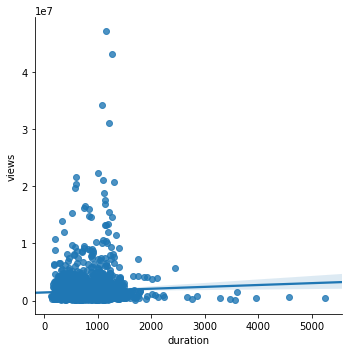

In [130]:
df_duration = df_main.sort_values('views', ascending=False)
df_duration = df_duration.sort_values('duration')
sns.lmplot(x="duration", y="views", data=df_duration)

<div class="alert alert-block alert-success">

## Campo: _event_
The TED/TEDx event where the talk took place.

 > **Tratamiento:** 
 > * El nombre del evento no tiene una estructura consistente.
 > * El nombre del evento no necesariamente indica que las charlas se realizaron un un mismo día. Ej.: Para TED2006 se realizaron 45 charlas y las mismas variaron entre 01-Feb-2006 hasta 02-Mar-20016.
 > * La información de Año de la charla se puede obtener del campo 'film_date'.
 > * Nuevas Features: 3 columnas
  * 'event_TED': Empieza con TED
  * 'event_TEDx': Empieza con TEDx
  * 'event_noTED'.: No contiene TED

</div>

In [0]:
df_main['event_TED'] = df_main['event'].str.contains("^TED[^x].*", regex=True)
df_main['event_TEDx'] = df_main['event'].str.contains("^TEDx.*", regex=True)
df_main['event_noTED'] =  df_main['event'].str.contains("^(?!(?:TED|TEDx)).*$", regex=True)

df_main[['event_TED','event_TEDx','event_noTED']]=df_main[['event_TED','event_TEDx','event_noTED']].astype('int')

df_main['TEDevent'] = \
  ['TED' if row.startswith('TED') and not row.startswith('TEDx') else 'TEDx' if row.startswith('TEDx') else 'notTED' for row in df_main['event']]

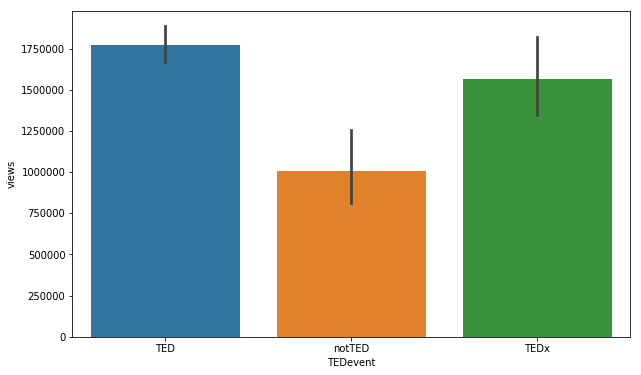

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='TEDevent', y='views', data=df_main)

<div class="alert alert-block alert-success">

## Campo: _languages_
The number of languages in which the talk is available.

 > **Tratamiento:** Se debe estandarizar el campo. Primero se debe realizar el 'train_test_split' y unicamente standarizar con los datos de train.

</div>

In [44]:
df_main['languages'].head()

0    60
1    43
2    26
3    35
4    48
Name: languages, dtype: int64

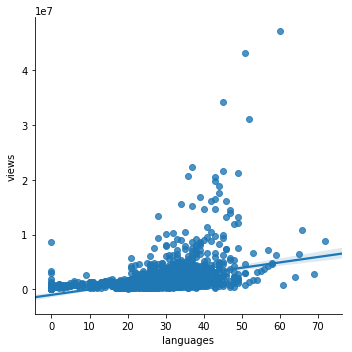

In [131]:
df_lang = df_main.sort_values('views', ascending=False)
df_lang = df_lang.sort_values('languages')
sns.lmplot(x="languages", y="views", data=df_lang)

<div class="alert alert-block alert-success">

## Campo: _main_speaker_
The first named speaker of the talk.

 > **Tratamiento:**
 > * Son más de 2156 speakers distintos. [1 talk, 1880][2 talks, 202][3 talks, 48][4 talks, 16][5 talks,6][6 talks,2][7 talks, 1][9 talks, 1]
 > * **Nuevos Feature:**
 1. previous_talks': Cantidad de charlas previas
 2. previous_talk_views: Cantidad de views en su última charla
 3. previous_views_sum: Suma de views de todas sus charlas previas
 4. previous_views_max: Máxima cantidad de views en charlas previas
 5. previous_views_min: Mínima cantidad de views en charlas previas
 

</div>

In [0]:
ser_main = df_main['main_speaker'].value_counts()

In [46]:
# Total de Speakers
len(ser_main.index)

2156

In [47]:
# Speakers con mas de N charlas
ser_main[ser_main>=3].index

Index(['Hans Rosling', 'Juan Enriquez', 'Marco Tempest', 'Rives',
       'Jacqueline Novogratz', 'Clay Shirky', 'Nicholas Negroponte',
       'Julian Treasure', 'Bill Gates', 'Dan Ariely', 'Ken Robinson',
       'Chris Anderson', 'Lawrence Lessig', 'Barry Schwartz', 'Dan Dennett',
       'Stewart Brand', 'Jonathan Haidt', 'Robert Full', 'David Pogue',
       'Eve Ensler', 'Tom Wujec', 'Al Gore', 'Stefan Sagmeister',
       'Kevin Kelly', 'Steven Johnson', 'Jonathan Drori', 'Rachel Botsman',
       'Andrew Solomon', 'Lucianne Walkowicz', 'John Maeda', 'David Gallo',
       'Mikko Hypponen', 'Rory Sutherland', 'Ngozi Okonjo-Iweala',
       'Malcolm Gladwell', 'Philip Zimbardo', 'Helen Fisher', 'Ze Frank',
       'Craig Venter', 'Dan Gilbert', 'Derek Sivers', 'Ray Kurzweil',
       'Christopher Soghoian', 'Sebastian Wernicke', 'Michael Green',
       'Pico Iyer', 'Adam Savage', 'Seth Godin', 'Tim Berners-Lee',
       'Aimee Mullins', 'Sarah Parcak', 'Blaise Agüera y Arcas', 'Brian Cox',
 

In [0]:
lst_previous_talks = []
lst_previous_talk_views = [] 
lst_previous_views_sum = [] 
lst_previous_views_max = []
lst_previous_views_min = []

df_main.sort_values(by=['film_date'], ascending=False, inplace=True)
df_main = df_main.reset_index(drop=True)

for ix, row in df_main.iterrows():
 
    df_where = df_main[ df_main['film_date'] < row['film_date'] ]
    df_where = df_where[ df_where['main_speaker'] == row['main_speaker'] ]
    df_where.reset_index(drop=True, inplace=True) 

    if len(df_where) == 0:
        lst_previous_talks.append(0)
        lst_previous_talk_views.append(0)
    else:
        lst_previous_talks.append(df_where.shape[0])
        lst_previous_talk_views.append(df_where.at[0,'views'])

    lst_previous_views_sum.append(df_where['views'].sum())
    lst_previous_views_max.append(df_where['views'].max())
    lst_previous_views_min.append(df_where['views'].min())
    

df_main['previous_talks'] = pd.Series(lst_previous_talks)
df_main['previous_talk_views'] = pd.Series(lst_previous_talk_views)
df_main['previous_views_sum'] = pd.Series(lst_previous_views_sum)
df_main['previous_views_max'] = pd.Series([ 0 if np.isnan(x) else x for x in lst_previous_views_max])
df_main['previous_views_min'] = pd.Series([ 0 if np.isnan(x) else x for x in lst_previous_views_min])

In [49]:
len(df_main[df_main.views==9999])

0

In [50]:
df_main[df_main['main_speaker']=="Hans Rosling"]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,film_year,film_month,film_dayofweek,published_year,published_month,published_dayofweek,film_month_name,film_day_name,published_month_name,published_day_name,event_TED,event_TEDx,event_noTED,TEDevent,previous_talks,previous_talk_views,previous_views_sum,previous_views_max,previous_views_min
1258,491,Hans Rosling had a question: Do some religions...,800,TEDxSummit,2012-04-16,36,Hans Rosling,Hans Rosling: Religions and babies,1,2012-05-22 15:00:56,"[{'id': 22, 'name': 'Fascinating', 'count': 86...","[{'id': 1418, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['TEDx', 'data', 'global issues', 'population'...",Religions and babies,https://www.ted.com/talks/hans_rosling_religio...,2138419,2012,4,0,2012,5,1,April,Monday,May,Tuesday,0,1,0,TEDx,8,2391977,25428708,12005869,738895
1658,268,What was the greatest invention of the industr...,555,TEDWomen 2010,2010-12-04,46,Hans Rosling,Hans Rosling: The magic washing machine,1,2011-03-21 13:33:00,"[{'id': 9, 'name': 'Ingenious', 'count': 457},...","[{'id': 620, 'hero': 'https://pe.tedcdn.com/im...",Global health expert; data visionary,"['culture', 'data', 'economics', 'women']",The magic washing machine,https://www.ted.com/talks/hans_rosling_and_the...,2391977,2010,12,5,2011,3,0,December,Saturday,March,Monday,1,0,0,TED,7,738895,23036731,12005869,738895
1709,342,Hans Rosling reframes 10 years of UN data with...,934,TEDxChange,2010-09-20,33,Hans Rosling,Hans Rosling: The good news of the decade? We'...,1,2010-10-07 09:12:00,"[{'id': 8, 'name': 'Informative', 'count': 554...","[{'id': 540, 'hero': 'https://pe.tedcdn.com/im...",Global health expert; data visionary,"['Africa', 'TEDx', 'data', 'global development...",The good news of the decade? We're winning the...,https://www.ted.com/talks/hans_rosling_the_goo...,738895,2010,9,0,2010,10,3,September,Monday,October,Thursday,0,1,0,TEDx,6,2934262,22297836,12005869,904813
1777,607,The world's population will grow to 9 billion ...,604,TED@Cannes,2010-06-21,46,Hans Rosling,"Hans Rosling: Global population growth, box by...",1,2010-07-09 08:15:00,"[{'id': 22, 'name': 'Fascinating', 'count': 76...","[{'id': 695, 'hero': 'https://pe.tedcdn.com/im...",Global health expert; data visionary,"['culture', 'data', 'demo', 'global issues', '...","Global population growth, box by box",https://www.ted.com/talks/hans_rosling_on_glob...,2934262,2010,6,0,2010,7,4,June,Monday,July,Friday,1,0,0,TED,5,1738069,19363574,12005869,904813
1933,276,Hans Rosling was a young guest student in Indi...,950,TEDIndia 2009,2009-11-04,36,Hans Rosling,Hans Rosling: Asia's rise -- how and when,1,2009-11-23 01:00:00,"[{'id': 22, 'name': 'Fascinating', 'count': 77...","[{'id': 92, 'hero': 'https://pe.tedcdn.com/ima...",Global health expert; data visionary,"['Asia', 'economics', 'health', 'india', 'stat...",Asia's rise -- how and when,https://www.ted.com/talks/hans_rosling_asia_s_...,1738069,2009,11,2,2009,11,0,November,Wednesday,November,Monday,1,0,0,TED,4,1471039,17625505,12005869,904813
2031,122,Talking at the US State Department this summer...,1196,TED@State,2009-06-04,33,Hans Rosling,Hans Rosling: Let my dataset change your mindset,1,2009-08-27 01:00:00,"[{'id': 22, 'name': 'Fascinating', 'count': 61...","[{'id': 92, 'hero': 'https://pe.tedcdn.com/ima...",Global health expert; data visionary,"['Africa', 'Asia', 'data', 'global development...",Let my dataset change your mindset,https://www.ted.com/talks/hans_rosling_at_state\n,1471039,2009,6,3,2009,8,3,June,Thursday,August,Thursday,1,0,0,TED,3,904813,16154466,12005869,904813
2068,125,Hans Rosling unveils data visuals that untangl...,602,TED2009,2009-02-06,40,Hans Rosling,"Hans Rosling: Insights on HIV, in stunning dat...",1,2009-05-13 06:50:00,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 499, 'hero': 'https://pe.tedcdn.com/im...",

<div class="alert alert-block alert-success">

## Campo: _name_
The official name of the TED Talk. Includes the title and the speaker.

 > **Tratamiento:** El nombre del speaker ya se encuentra en el campo 'main_speaker'. El título de charla ya se encuentra en el campo 'title'. Se elimina el campo.

</div>

In [53]:
df_main[['name','main_speaker','title']].head()

,name,main_speaker,title
0,Olúfẹ́mi Táíwò: Why Africa must become a ...,Olúfẹ́mi Táíwò,Why Africa must become a center of knowledge a...
1,Sethembile Msezane: Living sculptures that sta...,Sethembile Msezane,Living sculptures that stand for history's truths
2,OluTimehin Adegbeye: Who belongs in a city?,OluTimehin Adegbeye,Who belongs in a city?
3,Pierre Thiam: A forgotten ancient grain that c...,Pierre Thiam,A forgotten ancient grain that could help Afri...
4,Augie Picado: The real reason manufacturing jo...,Augie Picado,The real reason manufacturing jobs are disappe...


<div class="alert alert-block alert-success">

## Campo: _ratings_
A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)

 > **Tratamiento:** 
 * El campo es Texto: "[{ 'id':<...>, 'name':<...>, 'count':<...> }]"
 * El campo 'name' tiene un total de 14 valores posibles. 
 ["Funny", "Beautiful", "Ingenious", "Courageous", "Longwinded", "Confusing", "Informative", "Fascinating", "Unconvincing", "Persuasive", "Jaw-dropping", "OK", "Obnoxious", "Inspiring"]
 * Se genera una columna por cada rating posible

</div>

###  <font color=blue> **Estructura**:</font>  df_ratings

| ix | rating_funny | rating_beautiful | rating_ingenious | ... | rating_<14> | 
| :--- | :--- | :--- | :--- | --- | --- |
| 0 | 19645 | 4573 | 6073 | ... | ... |
| 1 | 544 | 58 | 56 | ... | ... |
| 2 | 964 | 60 | 183 | ... | ... | 
| ... | ...| ... | ... | ... | ... |
| 2549 | ...| ... | ... | ... | ... |

In [0]:
lst_ratings = ["Funny", "Beautiful", "Ingenious",
               "Courageous", "Longwinded", "Confusing",
               "Informative", "Fascinating", "Unconvincing",
               "Persuasive", "Jaw-dropping", "OK",
               "Obnoxious", "Inspiring"]

In [55]:
df_main['ratings'][0]

"[{'id': 1, 'name': 'Beautiful', 'count': 9}, {'id': 8, 'name': 'Informative', 'count': 37}, {'id': 24, 'name': 'Persuasive', 'count': 30}, {'id': 11, 'name': 'Longwinded', 'count': 1}, {'id': 21, 'name': 'Unconvincing', 'count': 1}, {'id': 26, 'name': 'Obnoxious', 'count': 1}, {'id': 10, 'name': 'Inspiring', 'count': 31}, {'id': 3, 'name': 'Courageous', 'count': 8}, {'id': 9, 'name': 'Ingenious', 'count': 4}, {'id': 22, 'name': 'Fascinating', 'count': 15}, {'id': 25, 'name': 'OK', 'count': 6}, {'id': 2, 'name': 'Confusing', 'count': 0}, {'id': 7, 'name': 'Funny', 'count': 0}, {'id': 23, 'name': 'Jaw-dropping', 'count': 0}]"

In [0]:
all_ratings = []

df_ratings = df_main['ratings']

for ix, ratings in df_ratings.items():
    
    rec_rating = {}
    rec_rating['ix'] = ix
    
    # String to Python Data Type
    ratings_lst = ast.literal_eval(ratings)

    for rating in ratings_lst:   
        rec_rating["rating_"+rating['name'].lower()]=rating['count']

    all_ratings.append(rec_rating)

In [0]:
df_ratings =  pd.DataFrame(all_ratings,
                           index=[ dic['ix'] for dic in all_ratings],
                           columns=["rating_funny","rating_beautiful","rating_ingenious",
                                    "rating_courageous","rating_longwinded","rating_confusing",
                                    "rating_informative","rating_fascinating","rating_unconvincing",
                                    "rating_persuasive","rating_jaw-dropping","rating_ok",
                                    "rating_obnoxious","rating_inspiring"] )

In [58]:
len(df_ratings)

2550

In [59]:
df_ratings.shape

(2550, 14)

In [60]:
df_ratings.head()

,rating_funny,rating_beautiful,rating_ingenious,rating_courageous,rating_longwinded,rating_confusing,rating_informative,rating_fascinating,rating_unconvincing,rating_persuasive,rating_jaw-dropping,rating_ok,rating_obnoxious,rating_inspiring
0,0,9,4,8,1,0,37,15,1,30,0,6,1,31
1,6,41,7,43,3,1,15,14,5,2,3,1,5,35
2,19,54,12,77,6,1,71,34,2,63,16,3,1,72
3,2,7,19,6,1,0,78,28,3,36,3,0,0,73
4,4,15,3,2,11,4,157,35,38,62,7,9,18,18


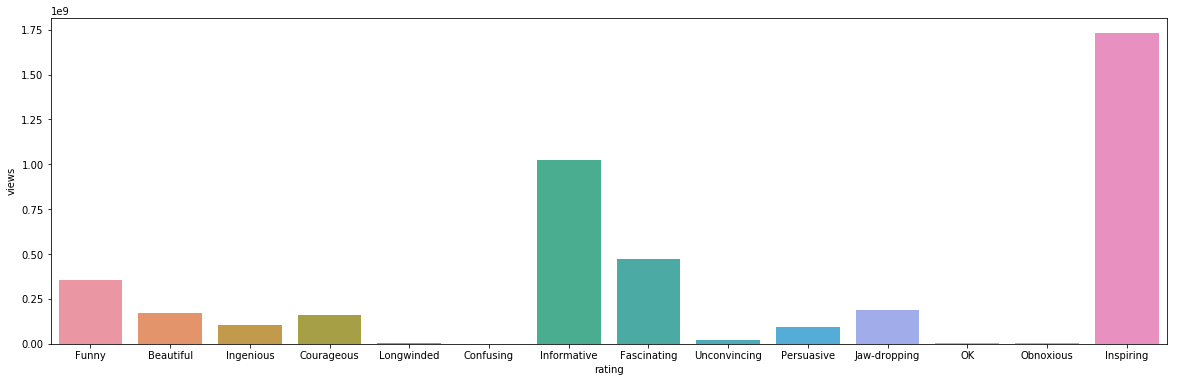

In [91]:
rating_graph = {}

for rating in lst_ratings:
  rating_graph[rating] = 0
  
for index, ratings in df_main['ratings'].items():
  ratings_lst = ast.literal_eval(ratings)
  max_rating = ''
  max_count = 0
  for rt in ratings_lst:
    if rt['count'] > max_count: 
      max_rating = rt['name']
      max_count = rt['count']
  rating_graph[max_rating] += df_main['views'][index]

rating_graph = pd.DataFrame(list(rating_graph.items()), columns=['rating', 'views'])
plt.figure(figsize=(20,6))
sns.barplot(x='rating', y='views', data=rating_graph, order=lst_ratings)

<div class="alert alert-block alert-success">

## Campo: _related_talks_
A list of dictionaries of recommended talks to watch next

 > **Tratamiento:** 
 * El campo es Texto: "[{ 'id':<..>, 'hero':<..>, 'speaker':<..>, 'title':<..>, 'duration':<..>, 'slug':<..>, 'viewed_count':<..> }]"
 * Se pensó que la cantidad de charlas relacionadas era variable, sin embargo se encontró que en la mayoría de los casos se asociaron con 6 charlas

</div>

In [61]:
df_main['related_talks'][3]

"[{'id': 2873, 'hero': 'https://pe.tedcdn.com/images/ted/635f76d5d4d0a454b6131b93b471d1f65065f14d_2880x1620.jpg', 'speaker': 'OluTimehin Adegbeye', 'title': 'Who belongs in a city?', 'duration': 723, 'slug': 'olutimehin_adegbeye_who_belongs_in_a_city', 'viewed_count': 707808}, {'id': 2522, 'hero': 'https://pe.tedcdn.com/images/ted/3d019f6e0d72892760d7162ed2881bdb0a9150e0_2880x1620.jpg', 'speaker': 'Andrew Youn', 'title': '3 reasons why we can win the fight against poverty', 'duration': 794, 'slug': 'andrew_youn_3_reasons_why_we_can_win_the_fight_against_poverty', 'viewed_count': 1173251}, {'id': 1306, 'hero': 'https://pe.tedcdn.com/images/ted/ce482bc47ad27c6eeaaafb4a539f029eee2e8311_800x600.jpg', 'speaker': 'Roger Doiron', 'title': 'My subversive (garden) plot', 'duration': 1129, 'slug': 'roger_doiron_my_subversive_garden_plot', 'viewed_count': 191584}, {'id': 1199, 'hero': 'https://pe.tedcdn.com/images/ted/e975f00df4827c6fbfc27ad3ffa820f1c609ce25_800x600.jpg', 'speaker': 'Josette Shee

In [65]:
related_talks_count = []

df_related_talks = df_main['related_talks']

for ix, related_talks in df_related_talks.items():
    
    rec_talks = {}
    rec_talks['ix'] = ix
    
    # String to Python Data Type
    lst_talks = ast.literal_eval(related_talks)

    related_talks_count.append(len(lst_talks))
    
related_talks_count[:10]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

<div class="alert alert-block alert-success">

## Campo: _speaker_occupation_
The occupation of the main speaker

 > **Tratamiento:** 
 * El campo tiene un total de 1459 valores distintos

</div>

In [66]:
len(df_main['speaker_occupation'].unique())

1459

In [0]:
df_aux = df_main.groupby('speaker_occupation', as_index=False).agg({'views':['sum','count','mean']})

In [0]:
df_grp = df_aux.sort_values(('views','mean'),ascending=False).reset_index(drop=True)

In [69]:
df_grp.head(40)

speaker_occupation  ...         views
                                                    ...          mean
0                                   Neuroanatomist  ...  2.119088e+07
1      Life coach; expert in leadership psychology  ...  2.068540e+07
2                                            Model  ...  1.978746e+07
3                         Vulnerability researcher  ...  1.957852e+07
4                                   Career analyst  ...  1.883098e+07
5                              Quiet revolutionary  ...  1.762928e+07
6                                     Lie detector  ...  1.686158e+07
7       Psychiatrist, psychoanalyst and Zen priest  ...  1.660193e+07
8   Director of research, Samsung Research America  ...  1.609708e+07
9                                  Author/educator  ...  1.575157e+07
10                   Illusionist, endurance artist  ...  1.560138e+07
11                                 Gentleman thief  ...  1.528324e+07
12                             Health psychologist  ...  1.456646e+07
13                             Comedian and writer  ...  1.309390e+07
14                               Leadership expert  ...  1.205094e+07
15                                 Social activist  ...  1.144319e+07
16                          Relationship therapist  ...  9.371470e+06
17                   Vocalist, beatboxer, comedian  ...  9.315931e+06
18                           Clinical psychologist  ...  8.958850e+06
19                            Comedian and writer   ...  8.879917e+06
20                                       Visionary  ...  8.744428e+06
21                                       Beatboxer  ...  8.688241e+06
22                           Writer and radio host  ...  8.444981e+06
23                        Mindful addiction doctor  ...  8.107178e+06
24                                         Blogger  ...  8.084668e+06
25                              Mindfulness expert  ...  8.033595e+06
26                                          Jetman  ...  7.900891e+06
27                                  Chef, activist  ...  7.638978e+06
28                                Bionics designer  ...  7.520736e+06
29                                  Yo-yo champion  ...  7.373875e+06
30                  Psychologist; happiness expert  ...  7.265485e+06
31                       Marketer, success analyst  ...  7.251422e+06
32                             Social psychologist  ...  7.101700e+06
33                        Circadian neuroscientist  ...  6.504999e+06
34                          Developer, 12 year old  ...  6.503775e+06
35                      Autonomous systems pioneer  ...  6.421088e+06
36                        Developmental researcher  ...  6.406853e+06
37                            Writer and filmmaker  ...  6.385279e+06
38         Founder and CEO, Future Today Institute  ...  6.298610e+06
39                                Sound consultant  ...  6.185532e+06

[40 rows x 4 columns]

<div class="alert alert-block alert-success">

## Campo: tags
The themes associated with the talk

 > **Tratamiento:** 
 * El campo es Texto: "['tag_1', 'tag_2', ... , 'tag']"
 * Existe un numero muy alto de posibles valores.
 * Se van solo a utilizar unicamente la siguiente lista (**26 tags**):
 ["technology", "science", "design", "business", "collaboration", "innovation", "social_change", "health", "nature", "environment", "future", "communication", "activism", "children", "personal_growth", "humanity", "society", "identity", "community", "culture", "global_issues", "entertainment", "art", "politics", "economics", "religion"]
 * Se genera una columna ('tag_<...>') por cada 'tag' en la lista y una columna adicional ('tag_other') donde se suman todas las restantes.

</div>

###  <font color=blue> **Estructura**:</font>  df_tags

| ix | tag_children | tag_creativity | tag_culture | ... | tag_other |
| :--- | :--- | :--- | :--- | --- | --- |
| 0 | 1 | 1 | 1 | ... | 1 |
| 1 | 0 | 0 | 0 | ... | 3 |
| 2 | 0 | 0 | 0 | ... | 2 |
| ... | ...| ... | ... | ... | ... |
| 2549 | ...| ... | ... | ... | ... |

In [92]:
df_main['tags'].head()

0    ['Africa', 'agriculture', 'history', 'leadersh...
1    ['Africa', 'activism', 'art', 'community', 'hi...
2    ['Africa', 'activism', 'cities', 'government',...
3    ['Africa', 'agriculture', 'farming', 'food', '...
4    ['business', 'capitalism', 'collaboration', 'e...
Name: tags, dtype: object

In [0]:
lst_tags = ["technology", "science", "design", "business", "collaboration", "innovation", "social_change",
            "health", "nature", "environment", "future", "communication", "activism", "children",
            "personal_growth", "humanity", "society", "identity", "community", "culture", "global_issues",
            "entertainment", "art", "politics", "economics", "religion"]

In [0]:
all_tags = []
df_tags = df_main['tags']

for ix, tags in df_tags.items():

    # --- Empty Dict ---
    rec_tag = {}
    rec_tag['ix'] = ix
    for tag in lst_tags:
        rec_tag["tag_"+tag.lower().replace(" ","_")]=0
    rec_tag['tag_other']=0
    
    # --- Update Dict ---
    tags = ast.literal_eval(tags)
    for tag in tags:
        
        if "tag_"+tag.lower() in rec_tag.keys():
            rec_tag["tag_"+tag.lower().replace(" ","_")]+=1
        else:
            rec_tag["tag_other"]+=1
            
    all_tags.append(rec_tag)

In [95]:
columns=[ "tag_"+tag.lower() for tag in lst_tags]
columns.append("tag_other")
print(columns)

['tag_technology', 'tag_science', 'tag_design', 'tag_business', 'tag_collaboration', 'tag_innovation', 'tag_social_change', 'tag_health', 'tag_nature', 'tag_environment', 'tag_future', 'tag_communication', 'tag_activism', 'tag_children', 'tag_personal_growth', 'tag_humanity', 'tag_society', 'tag_identity', 'tag_community', 'tag_culture', 'tag_global_issues', 'tag_entertainment', 'tag_art', 'tag_politics', 'tag_economics', 'tag_religion', 'tag_other']


In [0]:
df_tags =  pd.DataFrame(all_tags,
                        index=[ row['ix'] for row in all_tags ],
                        columns=columns)

In [97]:
df_tags.head()

,tag_technology,tag_science,tag_design,tag_business,tag_collaboration,tag_innovation,tag_social_change,tag_health,tag_nature,tag_environment,tag_future,tag_communication,tag_activism,tag_children,tag_personal_growth,tag_humanity,tag_society,tag_identity,tag_community,tag_culture,tag_global_issues,tag_entertainment,tag_art,tag_politics,tag_economics,tag_religion,tag_other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,6


In [98]:
len(df_tags)

2550

In [99]:
df_tags.shape

(2550, 27)

In [100]:
df_main.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,film_year,film_month,film_dayofweek,published_year,published_month,published_dayofweek,film_month_name,film_day_name,published_month_name,published_day_name,event_TED,event_TEDx,event_noTED,TEDevent,previous_talks,previous_talk_views,previous_views_sum,previous_views_max,previous_views_min
0,10,"How can Africa, the home to some of the larges...",810,TEDGlobal 2017,2017-08-27,1,Olúfẹ́mi Táíwò,Olúfẹ́mi Táíwò: Why Africa must become a ...,1,2017-09-19 15:06:53,"[{'id': 1, 'name': 'Beautiful', 'count': 9}, {...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...","Historian, philosopher","['Africa', 'agriculture', 'history', 'leadersh...",Why Africa must become a center of knowledge a...,https://www.ted.com/talks/oluf_mi_taiwo_why_af...,418368,2017,8,6,2017,9,1,August,Sunday,September,Tuesday,1,0,0,TED,0,0,0,0,0
1,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,2017-08-27,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,2017-09-15 15:08:13,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,2017,8,6,2017,9,4,August,Sunday,September,Friday,1,0,0,TED,0,0,0,0,0


In [101]:
df_main['url'][1]

'https://www.ted.com/talks/sethembile_msezane_living_sculptures_that_stand_for_history_s_truths\n'

<div class="alert alert-block alert-success">

## Join: df_ratings, df_tags, df_word_count

</div>

In [0]:
df_main = df_main.merge(df_ratings, left_index=True, right_index=True)

In [0]:
df_main = df_main.merge(df_tags, left_index=True, right_index=True)

In [104]:
df_main = df_main.merge(df_word_count, left_index=True, right_index=True)

NameError: ignored

<div class="alert alert-block alert-success">

## Drops

</div>

In [0]:
df_main.drop(columns=['film_date','published_date'], inplace=True)
df_main.drop(columns=['film_month_name','published_month_name'], inplace=True)
df_main.drop(columns=['film_day_name','published_day_name'], inplace=True)
df_main.drop(columns=['description','title'], inplace=True)
df_main.drop(columns=['event'], inplace=True)
df_main.drop(columns=['TEDevent'], inplace=True)
df_main.drop(columns=['main_speaker'], inplace=True)
df_main.drop(columns=['name'], inplace=True)
df_main.drop(columns=['related_talks'], inplace=True)
df_main.drop(columns=['ratings'], inplace=True)
df_main.drop(columns=['tags'], inplace=True)
df_main.drop(columns=['url'], inplace=True)

In [0]:
df_main.drop(columns=['speaker_occupation'], inplace=True)

In [0]:
df_main.drop(columns=['film_year','published_year'], inplace=True)

<div class="alert alert-block alert-success">

## Output Final

</div>

In [0]:
df_main.shape

(2550, 580)

In [0]:
df_main.head()

,comments,duration,languages,num_speaker,views,film_month,film_dayofweek,published_month,published_dayofweek,event_TED,...,world,worldwide,worth,write,writer,wrong,ye,year,york,young
0,10,810,1,1,418368,8,5,9,1,1,...,0,0,0,0,0,0,0,0,0,0
1,3,795,1,1,542088,8,5,9,4,1,...,0,0,0,0,0,0,0,0,0,0
2,8,723,4,1,707788,8,5,9,4,1,...,0,0,0,0,0,0,0,0,1,0
3,10,934,2,1,527314,8,5,9,2,1,...,0,0,0,0,0,0,0,0,0,0
4,33,722,4,1,613915,7,2,9,3,1,...,1,0,0,0,0,0,0,0,0,0


In [0]:
list(df_main.columns)

['comments',
 'duration',
 'languages',
 'num_speaker',
 'views',
 'film_month',
 'film_dayofweek',
 'published_month',
 'published_dayofweek',
 'event_TED',
 'event_TEDx',
 'event_noTED',
 'previous_talks',
 'previous_talk_views',
 'previous_views_sum',
 'previous_views_max',
 'previous_views_min',
 'rating_funny',
 'rating_beautiful',
 'rating_ingenious',
 'rating_courageous',
 'rating_longwinded',
 'rating_confusing',
 'rating_informative',
 'rating_fascinating',
 'rating_unconvincing',
 'rating_persuasive',
 'rating_jaw-dropping',
 'rating_ok',
 'rating_obnoxious',
 'rating_inspiring',
 'tag_technology',
 'tag_science',
 'tag_design',
 'tag_business',
 'tag_collaboration',
 'tag_innovation',
 'tag_social_change',
 'tag_health',
 'tag_nature',
 'tag_environment',
 'tag_future',
 'tag_communication',
 'tag_activism',
 'tag_children',
 'tag_personal_growth',
 'tag_humanity',
 'tag_society',
 'tag_identity',
 'tag_community',
 'tag_culture',
 'tag_global_issues',
 'tag_entertainment',


### Data: Transcripts

In [0]:
df_transcript.count()[0]

2467

In [0]:
df_transcript.columns

Index(['transcript', 'url'], dtype='object')

In [0]:
df_transcript.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


<div class="alert alert-block alert-success">

## Export

 > **Tratamiento:** 
 * El archivo de salida es: "ted_main_features.csv"
 * Se utiliza el separador pipe (|)

</div>

In [0]:
df_main.to_csv('./dataset/ted_main_features.csv',sep="|",quotechar='"', index=False)